In [2]:
#Just import anything I might need
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import os.path 
from os import path
import shutil
import requests
import io

import csv
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

Interesting relations:

The range of profit was -200mil to +700mil
Higher profit and higher rating were barely correlated
There are almost no correlations.

Action films tended to be either the biggest busts or the biggest successes

Largest correlation was gross income and budget at a 52% correlation. Profit and budget were only at 13% correlation


What to be able to predict: If a film will profit or bust based on company, budget, star actor, etc.


In [3]:
import pandas as pd
def fractional_split(data_set, test_fraction=0.3,seed=3410):
    data_count = len(data_set)
    test_count = int(test_fraction*data_count)
    
    np.random.seed(seed)
    shuffled_indices = np.random.permutation(data_count)
    
    #use the front of the shuffled list as test set
    #use the back of the shuffled list as the training set
    test_indices = shuffled_indices(test_count)
    train_indices = shuffled_indices(test_count)
    
    return data_set.iloc[train_indeces], data_set.iloc[test_indeces]

data_frame = pd.read_csv("moviesCopy.csv", sep=",")
#train_set, test_set =

#scikit-learning

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_frame, test_size=0.2,random_state=123)

#print some information
display(len(train_set), len(test_set))
print("\nTrain set")
display(train_set.head())
print("\n\nTest set")
display(test_set.head())

5417

1355


Train set


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Profit
220,220,220,220,16000000,Act III Communications,USA,Rob Reiner,Adventure,30857814,The Princess Bride,PG,10/9/1987,98,8.1,Cary Elwes,320953,William Goldman,1987,14857814
1458,1458,1458,1458,0,Morgan Creek Productions,USA,Roger Donaldson,Action,9011574,White Sands,R,4/24/1992,101,6.0,Willem Dafoe,5881,Daniel Pyne,1992,9011574
79,79,79,79,8700000,Delphi V Productions,USA,Paul Michael Glaser,Action,4865912,Band of the Hand,R,4/11/1986,109,6.3,Stephen Lang,2297,Leo Garen,1986,-3834088
5991,5991,5991,5991,50000000,Paramount Pictures,Germany,Tommy Wirkola,Action,55703475,Hansel y Gretel: Cazadores de brujas,R,1/25/2013,88,6.1,Jeremy Renner,170882,Tommy Wirkola,2013,5703475
2102,2102,2102,2102,11000000,Dog Eat Dog Films,USA,Michael Moore,Comedy,178104,Canadian Bacon,PG,9/22/1995,91,5.9,John Candy,14286,Michael Moore,1995,-10821896




Test set


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Profit
5436,5436,5436,5436,112000000,Twentieth Century Fox Film Corporation,USA,Rob Letterman,Adventure,42779261,Gulliver's Travels,PG,12/25/2010,85,4.9,Jack Black,56336,Joe Stillman,2010,-69220739
2711,2711,2711,2711,66000000,Twentieth Century Fox Film Corporation,USA,Rob Bowman,Drama,83898313,The X Files,PG-13,6/19/1998,121,7.0,David Duchovny,90546,Chris Carter,1998,17898313
2277,2277,2277,2277,20000000,Miramax,USA,Woody Allen,Comedy,9714482,Everyone Says I Love You,R,1/17/1997,101,6.8,Woody Allen,31731,Woody Allen,1996,-10285518
4653,4653,4653,4653,25000000,Dimension Films,USA,Mikael Håfström,Horror,71985628,1408,PG-13,6/22/2007,104,6.8,John Cusack,226504,Matt Greenberg,2007,46985628
4661,4661,4661,4661,110000000,Columbia Pictures Corporation,USA,Mark Steven Johnson,Action,115802596,Ghost Rider,PG-13,2/16/2007,114,5.2,Nicolas Cage,194164,Mark Steven Johnson,2007,5802596


Profit vs Budget


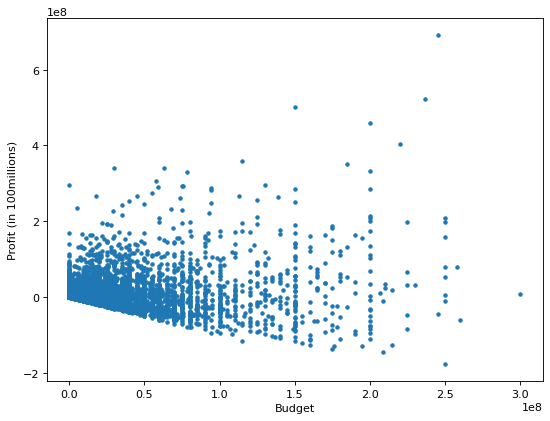

Movies that net lost money


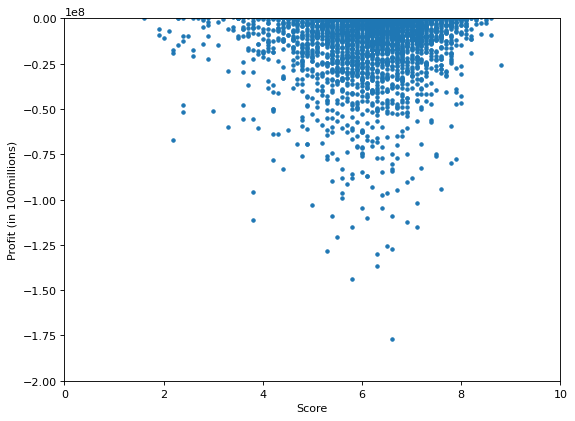

Movies that net made money


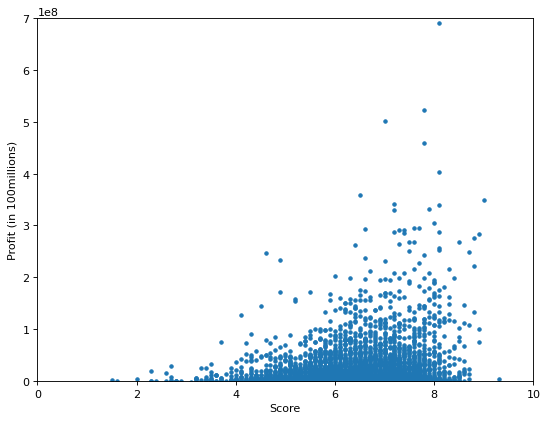

Both graphs


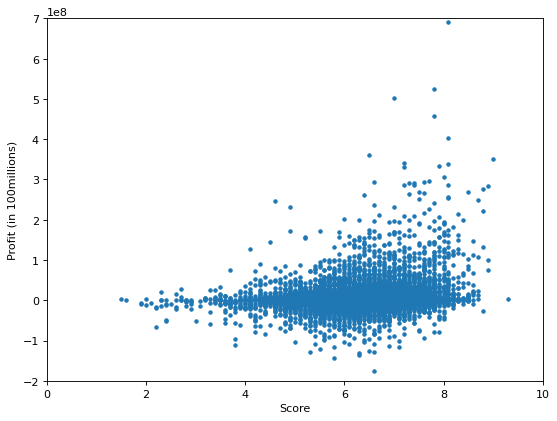

Film Budgets vs rating


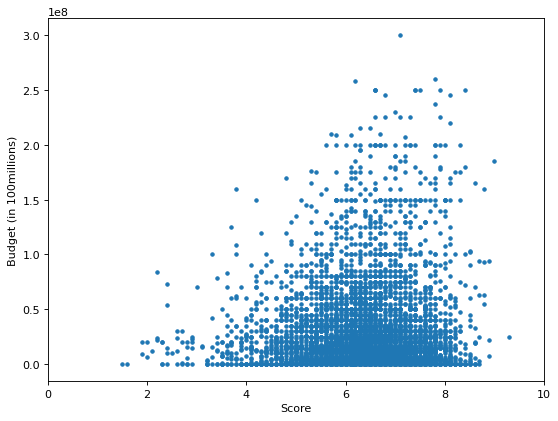

Most films got around a 6.5 rating with a $50m budget


Rating vs Budget


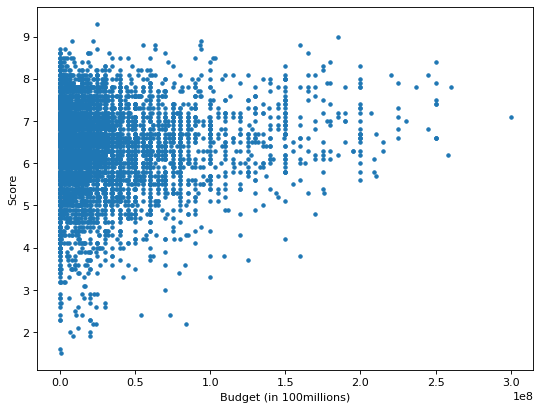

Film genre vs Average profit


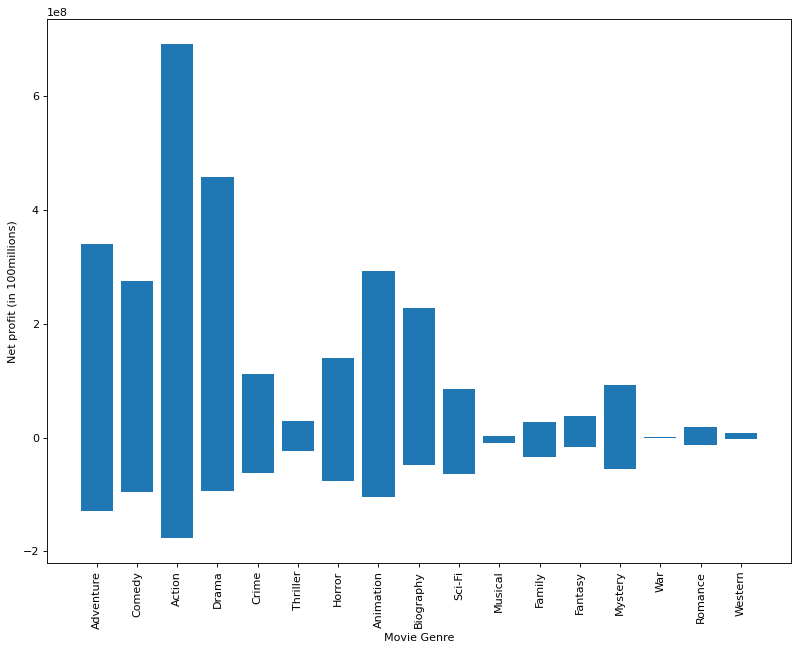




Most and least profitable movies


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,budget,company,...,name,rating,released,runtime,score,star,votes,writer,year,Profit
6380,6380,6380,6380,6380,6380,6380,6380,6380,245000000,Lucasfilm,...,Star Wars: The Force Awakens,PG-13,12/18/2015,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,691662225
5061,5061,5061,5061,5061,5061,5061,5061,5061,237000000,Twentieth Century Fox Film Corporation,...,Avatar,PG-13,12/18/2009,162,7.8,Sam Worthington,954412,James Cameron,2009,523507625
6391,6391,6391,6391,6391,6391,6391,6391,6391,150000000,Universal Pictures,...,Jurassic World,PG-13,6/12/2015,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,502270625
2420,2420,2420,2420,2420,2420,2420,2420,2420,200000000,Twentieth Century Fox Film Corporation,...,Titanic,PG-13,12/19/1997,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,458672302
5723,5723,5723,5723,5723,5723,5723,5723,5723,220000000,Marvel Studios,...,The Avengers,PG-13,5/4/2012,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,403357910


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,budget,company,...,name,rating,released,runtime,score,star,votes,writer,year,Profit
5757,5757,5757,5757,5757,5757,5757,5757,5757,250000000,Walt Disney Pictures,...,John Carter,PG-13,3/9/2012,132,6.6,Taylor Kitsch,224234,Andrew Stanton,2012,-176921900
5736,5736,5736,5736,5736,5736,5736,5736,5736,209000000,Universal Pictures,...,Battleship,PG-13,5/18/2012,131,5.8,Alexander Skarsgård,213632,Jon Hoeber,2012,-143577375
6034,6034,6034,6034,6034,6034,6034,6034,6034,175000000,H2F Entertainment,...,47 Ronin,PG-13,12/25/2013,119,6.3,Keanu Reeves,125778,Chris Morgan,2013,-136637525
6039,6039,6039,6039,6039,6039,6039,6039,6039,195000000,New Line Cinema,...,Jack the Giant Slayer,PG-13,3/1/2013,114,6.3,Nicholas Hoult,113861,Darren Lemke,2013,-129812397
6403,6403,6403,6403,6403,6403,6403,6403,6403,176000000,Warner Bros.,...,Jupiter Ascending,PG-13,2/6/2015,127,5.3,Channing Tatum,153531,Lilly Wachowski,2015,-128612277
2910,2910,2910,2910,2910,2910,2910,2910,2910,160000000,Touchstone Pictures,...,The 13th Warrior,R,8/27/1999,102,6.6,Antonio Banderas,105423,Michael Crichton,1999,-127301101
6013,6013,6013,6013,6013,6013,6013,6013,6013,215000000,Walt Disney Pictures,...,The Lone Ranger,PG-13,7/3/2013,150,6.5,Johnny Depp,194951,Justin Haythe,2013,-125697885
4003,4003,4003,4003,4003,4003,4003,4003,4003,155000000,Warner Bros.,...,Alexander,R,11/24/2004,175,5.5,Colin Farrell,146107,Oliver Stone,2004,-120702809
3378,3378,3378,3378,3378,3378,3378,3378,3378,115000000,Universal Pictures,...,Juego de espías,R,11/21/2001,126,7.1,Robert Redford,127397,Michael Frost Beckner,2001,-114973129
6461,6461,6461,6461,6461,6461,6461,6461,6461,150000000,Warner Bros.,...,Pan,PG,10/9/2015,111,5.8,Levi Miller,49650,Jason Fuchs,2015,-114911680





Highest budget movie


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,budget,company,...,name,rating,released,runtime,score,star,votes,writer,year,Profit
4631,4631,4631,4631,4631,4631,4631,4631,4631,300000000,Walt Disney Pictures,...,Pirates of the Caribbean: At World's End,PG-13,5/25/2007,169,7.1,Johnny Depp,514191,Ted Elliott,2007,9420425
5293,5293,5293,5293,5293,5293,5293,5293,5293,260000000,Walt Disney Animation Studios,...,Tangled,PG,11/24/2010,100,7.8,Mandy Moore,325621,Dan Fogelman,2010,-59178064
4637,4637,4637,4637,4637,4637,4637,4637,4637,258000000,Columbia Pictures,...,Spider-Man 3,PG-13,5/4/2007,139,6.2,Tobey Maguire,416842,Sam Raimi,2007,78530303
5065,5065,5065,5065,5065,5065,5065,5065,5065,250000000,Warner Bros.,...,Harry Potter and the Half-Blood Prince,PG,7/15/2009,153,7.5,Daniel Radcliffe,362271,Steve Kloves,2009,51959197
5502,5502,5502,5502,5502,5502,5502,5502,5502,250000000,Walt Disney Pictures,...,Pirates of the Caribbean: On Stranger Tides,PG-13,5/20/2011,100,6.6,Johnny Depp,408968,Ted Elliott,2011,-8928198





Correlations


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1,Unnamed: 0.1.1.1.1.1.1.1,budget,gross,runtime,score,votes,year,Profit
Unnamed: 0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.205899,0.088158,0.071683,0.065929,0.321554,0.983764,-0.065448
Unnamed: 0.1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.205899,0.088158,0.071683,0.065929,0.321554,0.983764,-0.065448
Unnamed: 0.1.1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.205899,0.088158,0.071683,0.065929,0.321554,0.983764,-0.065448
Unnamed: 0.1.1.1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.205899,0.088158,0.071683,0.065929,0.321554,0.983764,-0.065448
Unnamed: 0.1.1.1.1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.205899,0.088158,0.071683,0.065929,0.321554,0.983764,-0.065448
Unnamed: 0.1.1.1.1.1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.205899,0.088158,0.071683,0.065929,0.321554,0.983764,-0.065448
Unnamed: 0.1.1.1.1.1.1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.205899,0.088158,0.071683,0.065929,0.321554,0.983764,-0.065448
Unnamed: 0.1.1.1.1.1.1.1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.205899,0.088158,0.071683,0.065929,0.321554,0.983764,-0.065448
budget,0.205899,0.205899,0.205899,0.205899,0.205899,0.205899,0.205899,0.205899,1.000000,0.523359,0.165126,-0.019559,0.451181,0.221071,-0.134415
gross,0.088158,0.088158,0.088158,0.088158,0.088158,0.088158,0.088158,0.088158,0.523359,1.000000,0.138995,0.033544,0.480412,0.104921,0.379388


In [27]:

moviesDF = pd.read_csv("moviesCopy.csv")
moviesDF.dropna()
moviesDF.to_csv("moviesCopy.csv")

print("Profit vs Budget")
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(moviesDF["budget"], moviesDF["Profit"], marker =".")
plt.ylabel("Profit (in 100millions)")
plt.xlabel("Budget")
plt.show()

print("Movies that net lost money")
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(moviesDF["score"], moviesDF["Profit"], marker =".")
plt.ylabel("Profit (in 100millions)")
plt.xlabel("Score")
plt.xlim(0, 10)
plt.ylim(-200000000,0)
plt.show()

print("Movies that net made money")
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(moviesDF["score"], moviesDF["Profit"], marker =".")
plt.ylabel("Profit (in 100millions)")
plt.xlabel("Score")
plt.xlim(0, 10)
plt.ylim(0,700000000)
plt.show()

print("Both graphs")
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(moviesDF["score"], moviesDF["Profit"], marker =".")
plt.ylabel("Profit (in 100millions)")
plt.xlabel("Score")
plt.xlim(0, 10)
plt.ylim(-200000000,700000000)
plt.show()


print("Film Budgets vs rating")
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(moviesDF["score"], moviesDF["budget"], marker =".")
plt.ylabel("Budget (in 100millions)")
plt.xlabel("Score")
plt.xlim(0, 10)
#plt.ylim(-200000000,700000000)
plt.show()
print("Most films got around a 6.5 rating with a $50m budget\n\n")

print("Rating vs Budget")
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(moviesDF["budget"], moviesDF["score"], marker =".")
plt.ylabel("Score")
plt.xlabel("Budget (in 100millions)")
#plt.xlim(0, 10)
#plt.ylim(-200000000,700000000)
plt.show()


print("Film genre vs Average profit")
figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.bar(moviesDF["genre"],moviesDF["Profit"])
plt.xlabel("Movie Genre")
plt.xticks(rotation = 90)
plt.ylabel("Net profit (in 100millions)")
plt.show()

"""
print("Film Company vs Profit")
figure(num=None, figsize=(24,16), dpi=60, facecolor='w', edgecolor='k')
plt.bar(moviesDF["company"],moviesDF["Profit"])
plt.xlabel("Company")
plt.xticks(rotation = 90)
plt.ylabel("Net profit in 100m")
plt.show()


print(moviesDF.describe())

print("Film genre vs profit (average) (Positive)")
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.bar(moviesDF["genre"],moviesDF["Profit"].mean())
plt.xlabel("Movie Genre")
plt.ylabel("Net profit (in 100millions)")
plt.ylim(0,)
plt.show()
"""


print("\n\n\nMost and least profitable movies")
display(moviesDF.nlargest(5,"Profit"))
print("\n\n")
display(moviesDF.nsmallest(10,"Profit"))

    

print("\n\n\nHighest budget movie")
display(moviesDF.nlargest(5,"budget"))

print("\n\n\nCorrelations")
display(moviesDF.corr(method="kendall"))
#moviesDF["Profit"], moviesDF["budget"])
#print(moviesDF.corr(moviesDF["rating"], moviesDF["Profit"]))
#print(moviesDF.corr(moviesDF["budget"], moviesDF["rating"]))

In [24]:
testDF = pd.read_csv("moviesCopyTrimmed.csv")
testDF.drop(labels = "Unnamed: 0", axis = 1, inplace = True)
testDF.describe()

,budget,gross,runtime,score,votes,Profit
count,6.772000e+03,6.772000e+03,6772.000000,6772.000000,6.772000e+03,6.772000e+03
mean,2.470267e+07,3.366642e+07,106.604696,6.376167,7.162959e+04,8.963749e+06
std,3.711686e+07,5.835288e+07,18.055645,1.003988,1.308859e+05,4.121820e+07
min,0.000000e+00,3.090000e+02,50.000000,1.500000,2.700000e+01,-1.769219e+08
25%,0.000000e+00,1.533799e+06,95.000000,5.800000,7.679750e+03,-5.305438e+06
50%,1.100000e+07,1.225487e+07,102.000000,6.400000,2.631700e+04,9.265295e+05
75%,3.200000e+07,4.012423e+07,115.000000,7.100000,7.635175e+04,1.411235e+07
max,3.000000e+08,9.366622e+08,366.000000,9.300000,1.861666e+06,6.916622e+08


In [19]:
data_frame = pd.read_csv("movie.csv")
data_frame.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,Profit
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986,44287414
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986,64136369
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986,164800601
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986,66660248
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,9564613
5,6000000,Hemdale,UK,Oliver Stone,Drama,138530565,Platoon,R,2/6/1987,120,8.1,Charlie Sheen,317585,Oliver Stone,1986,132530565
6,25000000,Henson Associates (HA),UK,Jim Henson,Adventure,12729917,Labyrinth,PG,6/27/1986,101,7.4,David Bowie,102879,Dennis Lee,1986,-12270083
7,6000000,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228,Blue Velvet,R,10/23/1986,120,7.8,Isabella Rossellini,146768,David Lynch,1986,2551228
8,9000000,Paramount Pictures,USA,Howard Deutch,Comedy,40471663,Pretty in Pink,PG-13,2/28/1986,96,6.8,Molly Ringwald,60565,John Hughes,1986,31471663
9,15000000,SLM Production Group,USA,David Cronenberg,Drama,40456565,The Fly,R,8/15/1986,96,7.5,Jeff Goldblum,129698,George Langelaan,1986,25456565


In [25]:
data_frame.describe()

,budget,gross,runtime,score,votes,year,Profit
count,6.772000e+03,6.772000e+03,6772.000000,6772.000000,6.772000e+03,6772.000000,6.772000e+03
mean,2.470267e+07,3.366642e+07,106.604696,6.376167,7.162959e+04,2000.893975,8.963749e+06
std,3.711686e+07,5.835288e+07,18.055645,1.003988,1.308859e+05,8.886224,4.121820e+07
min,0.000000e+00,3.090000e+02,50.000000,1.500000,2.700000e+01,1986.000000,-1.769219e+08
25%,0.000000e+00,1.533799e+06,95.000000,5.800000,7.679750e+03,1993.000000,-5.305438e+06
50%,1.100000e+07,1.225487e+07,102.000000,6.400000,2.631700e+04,2001.000000,9.265295e+05
75%,3.200000e+07,4.012423e+07,115.000000,7.100000,7.635175e+04,2009.000000,1.411235e+07
max,3.000000e+08,9.366622e+08,366.000000,9.300000,1.861666e+06,2016.000000,6.916622e+08



## Data frame code as backup in markdown, been changing datasets this is a backup

print("Movies that net lost money")
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(moviesDF["score"], moviesDF["Profit"], marker =".")
plt.ylabel("Profit (in 100millions)")
plt.xlabel("Score")
plt.xlim(0, 10)
plt.ylim(-200000000,0)
plt.show()

print("Movies that net made money")
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(moviesDF["score"], moviesDF["Profit"], marker =".")
plt.ylabel("Profit (in 100millions)")
plt.xlabel("Score")
plt.xlim(0, 10)
plt.ylim(0,700000000)
plt.show()

print("Both graphs")
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(moviesDF["score"], moviesDF["Profit"], marker =".")
plt.ylabel("Profit (in 100millions)")
plt.xlabel("Score")
plt.xlim(0, 10)
plt.ylim(-200000000,700000000)
plt.show()


print("Film Budgets vs rating")
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(moviesDF["score"], moviesDF["budget"], marker =".")
plt.ylabel("Budget (in 100millions)")
plt.xlabel("Score")
plt.xlim(0, 10)
#plt.ylim(-200000000,700000000)
plt.show()
print("Most films got around a 6.5 rating with a $50m budget\n\n")

print("Rating vs Budget")
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(moviesDF["budget"], moviesDF["score"], marker =".")
plt.ylabel("Score")
plt.xlabel("Budget (in 100millions)")
#plt.xlim(0, 10)
#plt.ylim(-200000000,700000000)
plt.show()


print("Film genre vs Average profit")
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.bar(moviesDF["genre"],moviesDF["Profit"])
plt.xlabel("Movie Genre")
plt.xticks(rotation = 90)
plt.ylabel("Net profit (in 100millions)")
plt.show()

print("Film Company vs Profit")
figure(num=None, figsize=(24,16), dpi=60, facecolor='w', edgecolor='k')
plt.bar(moviesDF["company"],moviesDF["Profit"])
plt.xlabel("Company")
plt.xticks(rotation = 90)
plt.ylabel("Net profit in 100m")
plt.show()


print(moviesDF.describe())

print("Film genre vs profit (average) (Positive)")
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
plt.bar(moviesDF["genre"],moviesDF["Profit"].mean())
plt.xlabel("Movie Genre")
plt.ylabel("Net profit (in 100millions)")
plt.ylim(0,)
plt.show()

print("\n\n\nMost and least profitable movies")
print(moviesDF.nlargest(5,"Profit"))
print("\n\n")
print(moviesDF.nsmallest(5,"Profit"))

    

print("\n\n\nHighest budget movie")
print(moviesDF.nlargest(5,"budget"))

print("\n\n\nCorrelations")
print(moviesDF.corr(method="kendall"))
#moviesDF["Profit"], moviesDF["budget"])
#print(moviesDF.corr(moviesDF["rating"], moviesDF["Profit"]))
#print(moviesDF.corr(moviesDF["budget"], moviesDF["rating"]))

### Failed dataset pt 2
# Too big of a dataset

#Drop data without values
bitcoinDF = bitcoinDF.dropna()

#Drop every odd entry to reduce sheer volume of data
for i in bitcoinDF:
    if(bitcoinDF[0]%2 != 0):
        bitcoinDF.drop(i)
bitcoinDF.to_csv("BitcoinData_Refined.csv")

#Open reader for editted copy from before
csv_reader = open("BitcoinData.csv", "r", encoding='utf-8')
csv_reader = csv.reader(csv_reader, delimiter=",")


#Create writer in case we need to add more features
csv_output = open("BitcoinDataOutput.csv", "w", encoding='utf-8')
csv_output = csv.writer(csv_output, delimiter=",")

## Failed dataset pt 3
# Too big of a dataset

credCardDF = pd.read_csv("creditcard.csv")
credCardDF.head(20)
credCardDF.tail(20)

credCardDF.dropna()

print(credCardDF[1])
#Reduce dataset size at pseudorandom
#for i in credCardDF:
    #if(int(i[0])%3==0):
        #credCardDF.drop(credCard[i])

credCardDF.head(20)
    

credCardDF.to_csv("credCardClean.csv")




## Student performance on test exams using sex, race, parent education, and test prep.

I rewrote the csv to have numeric values for race, sex, parental education, and test prep instead of string values so that I could include them in my correlation matrix.


## Disclaimer this is a fictional dataset, it does not represet real students

In [7]:


StudPerfDF = pd.read_csv("StudentsPerformance.csv")
StudPerfDF = StudPerfDF.dropna()

#Open reader for editted copy from before
csv_reader = open("StudentsPerformance.csv", "r", encoding='utf-8')
csv_reader = csv.reader(csv_reader, delimiter=",")


#Create writer in case we need to add/edit more features
csv_output = open("StudPerfOut.csv", "w", encoding='utf-8')
csv_output = csv.writer(csv_output, delimiter=",")


"""
Replace string values with numerical values so we can include in correlation
"""
for i in csv_reader:
    
    #If it is the first row, write our headers
    if(i[0]=="gender"):
        csv_output.writerow(["gender","race","parent_education","lunch","test_prep","math_score", "reading_score", "writing_score"])
        
        
    #If not our first row
    else:
        #Rewrite sex/gender
        if(i[0]=="male"):
            sex = 1
        elif(i[0] == "female"):
            sex = 0
        
        #Rewrite race as numbers
        if(i[1]=="group A"):
            race = 0
        elif(i[1]=="group B"):
            race = 1
        elif(i[1]=="group C"):
            race = 2
        elif(i[1]=="group D"):
            race = 3
        elif(i[1]=="group E"):
            race = 4
            
        #Rewrite parent education. "some highschool" or "high schooL" is 0. "some college" or "associates" is 1. Bachelors is 2, masters is 3
        if("high school" in i[2]):
            parEd = 0
        elif(i[2]=="some college" or "associate" in i[2]):
            parEd = 1
        elif("bachelor" in i[2]):
            parEd = 2
        elif("master" in i[2]):
            parEd = 3
        #If there is a value I didn't forsee just put it as high school
        else:
            parEd = 0
                
        #Lunch, free/reduced = 0, standard = 1
        if(i[3]=="free/reduced"):
            lunch = 0
        elif(i[3]=="standard"):
            lunch = 1
            
        #test prep
        if(i[4]=="none"):
            testP = 0
        else:
            testP = 1
            
        #Write row using the new numeric values
        csv_output.writerow([sex, race, parEd, lunch, testP, i[5], i[6], i[7]])
        
        
#Update dataframe
StudPerfDF = pd.read_csv("StudPerfOut.csv")
        

display(StudPerfDF.head(15))


print("\n\nCorrelations - Kendall")
display(StudPerfDF.corr(method="kendall"))


print("\n\nCorrelations - Pearson")
display(StudPerfDF.corr(method="pearson"))


print("\n\nCorrelations - Spearman")
display(StudPerfDF.corr(method="spearman"))

#{‘pearson’, ‘kendall’, ‘spearman’}

print("Race vs math scores")
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(StudPerfDF["math_score"], StudPerfDF["race"], marker =".")
plt.ylabel("race")
plt.xlabel("Math exam scores")

print("Parent Education vs Reading score")
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(StudPerfDF["reading_score"], StudPerfDF["parent_education"], marker =".")
plt.ylabel("Parent education (some high school (0) through masters degree (3))")
plt.xlabel("Reading score")

print("Lunch vs Math scores")
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(StudPerfDF["math_score"], StudPerfDF["lunch"], marker =".")
plt.ylabel("Lunch")
plt.xlabel("Math score")

print("reading score vs writing score")
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(StudPerfDF["reading_score"], StudPerfDF["writing_score"], marker =".")
plt.ylabel("Reading exam scores")
plt.xlabel("Writing Score")



"""
#Code from assignment 3 to remind me how to edit my csv
#write to a copy
csv_output = open("workingsetCopy.csv", "w")
csv_output = csv.writer(csv_output, delimiter=",")
    
    
#iterate through
for i in csv_reader:
    fxdData = "Date"
    
    #Ignore first value because that is "date"
    #if i[0] == "Date":
        #csv_output.writerow(['Date','City','Min_Temp','Max_Temp','Rainfall','Evaporation','Sunshine','Wind_Gust_Dir','Wind_Gust_Speed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','Rain_Today','Rain_Tommorrow'])
    if i[0] != "Date":
        
        #take the string we are working with
        wrkStr = i[0]
        wrkStr = wrkStr.replace("-", "")
        
        #Assign Data to integer, so when we plot it it can actually be plotted lol
        fxdData = int(wrkStr)
    csv_output.writerow([fxdData, i[1], i[2], i[3], i[4], i[5], i[6], i[7], i[8], i[9], i[10], i[11], i[12], i[13], i[14], i[15], i[16], i[17], i[18], i[19], i[20], i[21], i[22]])
"""

FileNotFoundError: [Errno 2] No such file or directory: 'StudentsPerformance.csv'

## Heart attack risk dataset, using cholestoral, peak heartrate, age, sex, etc. to predict if someone will/has had a heart attack.

Strong contenders are sex (30%), chest pain (43%), exercise (43%)
Weak contributers: Cholesterol (9%)

In [8]:
heartDF = pd.read_csv("heart.csv")
heartDF = heartDF.dropna()

print("Correlations")
display(heartDF.corr(method="kendall"))

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

## Bank Churn data, guess how long a customer will stay with you depending on a few factors, no good correlations so I am scrapping this one.

In [14]:
bankChurDF = pd.read_csv("BankChurners.csv")

#Clean data a little
cleanedDF = bankChurDF.drop(axis=1, labels="Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1")
cleanedDF = cleanedDF.drop(axis=1, labels="Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2")
cleanedDF = cleanedDF.dropna()

print("Correlations")
display(cleanedDF.corr(method = "kendall"))

#No good correlations

Correlations


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.011807,-0.002890,0.074625,0.009944,-0.006376,0.008438,0.009513,0.002217,0.007474,0.015758,-0.001121,0.004475,0.010932,0.004510
Customer_Age,0.011807,1.000000,-0.109732,0.613382,-0.010539,0.034375,-0.010912,0.001835,0.009431,-0.001169,-0.048314,-0.023698,-0.035966,-0.027597,0.007341
Dependent_count,-0.002890,-0.109732,1.000000,-0.088070,-0.028358,-0.007615,-0.033652,0.037302,-0.002673,0.039961,-0.019210,0.042314,0.038785,0.006866,-0.026187
Months_on_book,0.074625,0.613382,-0.088070,1.000000,-0.010424,0.045357,-0.006405,0.004765,0.004449,0.005326,-0.037716,-0.018914,-0.026471,-0.023385,-0.002473
Total_Relationship_Count,0.009944,-0.010539,-0.028358,-0.010424,1.000000,-0.005449,0.049132,-0.042777,0.008818,-0.051310,0.018283,-0.199162,-0.163437,0.017357,0.048212
Months_Inactive_12_mon,-0.006376,0.034375,-0.007615,0.045357,-0.005449,1.000000,0.025586,-0.020776,-0.032951,-0.011847,-0.014242,-0.024174,-0.038544,-0.035145,-0.020729
Contacts_Count_12_mon,0.008438,-0.010912,-0.033652,-0.006405,0.049132,0.025586,1.000000,0.016920,-0.034155,0.024698,-0.015573,-0.123556,-0.125381,-0.069282,-0.044626
Credit_Limit,0.009513,0.001835,0.037302,0.004765,-0.042777,-0.020776,0.016920,1.000000,0.095780,0.805012,0.014132,0.018283,0.022810,-0.007639,-0.359205
Total_Revolving_Bal,0.002217,0.009431,-0.002673,0.004449,0.008818,-0.032951,-0.034155,0.095780,1.000000,-0.107351,0.024791,0.013353,0.028859,0.053766,0.533326
Avg_Open_To_Buy,0.007474,-0.001169,0.039961,0.005326,-0.051310,-0.011847,0.024698,0.805012,-0.107351,1.000000,0.004515,0.013561,0.014343,-0.026698,-0.561205
